In [1]:
# %store -r df
import pandas
df = pandas.read_hdf('reviews.h5')
df['text_len'] = df['text'].str.len()
df['word_cnt'] = df.text.apply(lambda x: len(str(x).split()))

In [2]:
df.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_len,word_cnt
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204,39
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1561,274
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615,109


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def hist_box(x):
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.07, .93)})
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

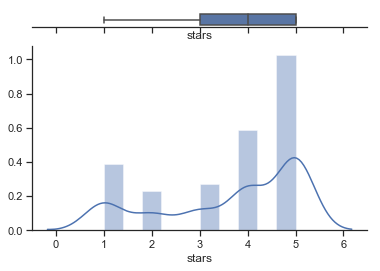

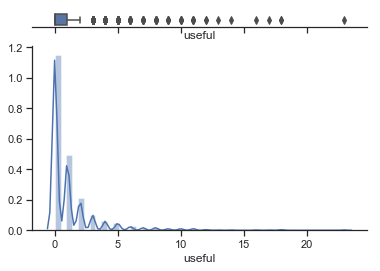

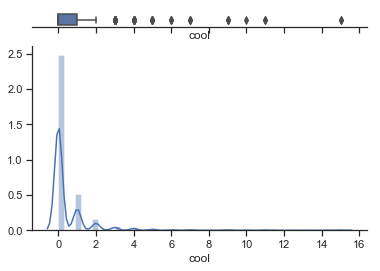

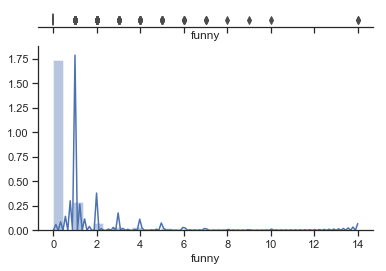

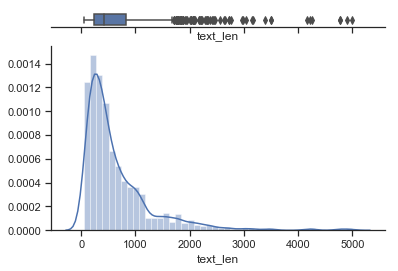

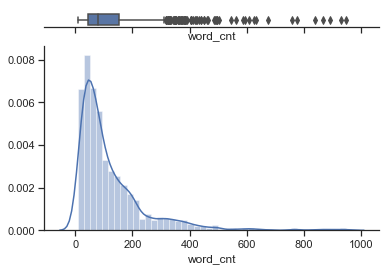

In [56]:
hist_box(df.stars)
hist_box(df.useful)
hist_box(df.cool)
hist_box(df.funny)
hist_box(df.text_len)
hist_box(df.word_cnt)

### basic histograms

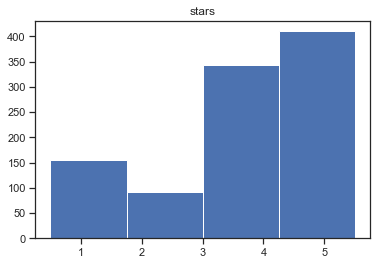

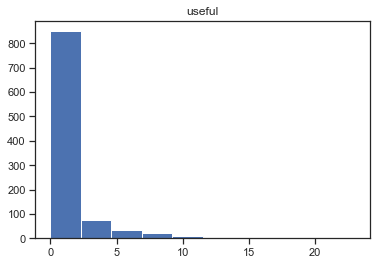

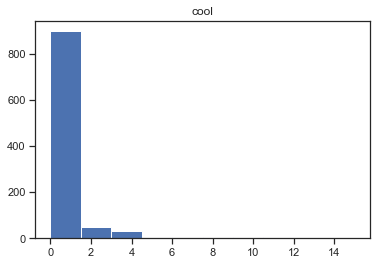

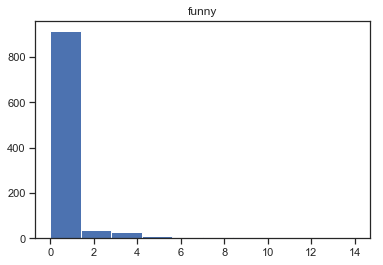

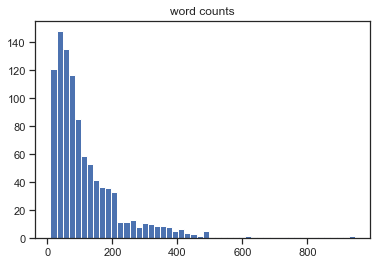

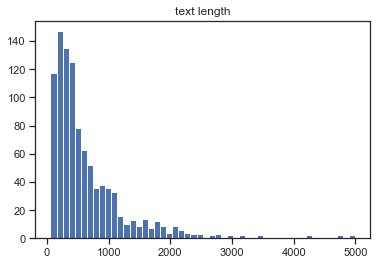

In [70]:
plt.hist(df.stars,range=(0.5, 5.5), bins=4) ; plt.title('stars')       ; plt.show()
plt.hist(df.useful,   bins=10) ; plt.title('useful')      ; plt.show()
plt.hist(df.cool,     bins=10) ; plt.title('cool')        ; plt.show()
plt.hist(df.funny,    bins=10) ; plt.title('funny')       ; plt.show()
plt.hist(df.word_cnt, bins=50) ; plt.title('word counts') ; plt.show()
plt.hist(df.text_len, bins=50) ; plt.title('text length') ; plt.show()

# Correlation Analysis

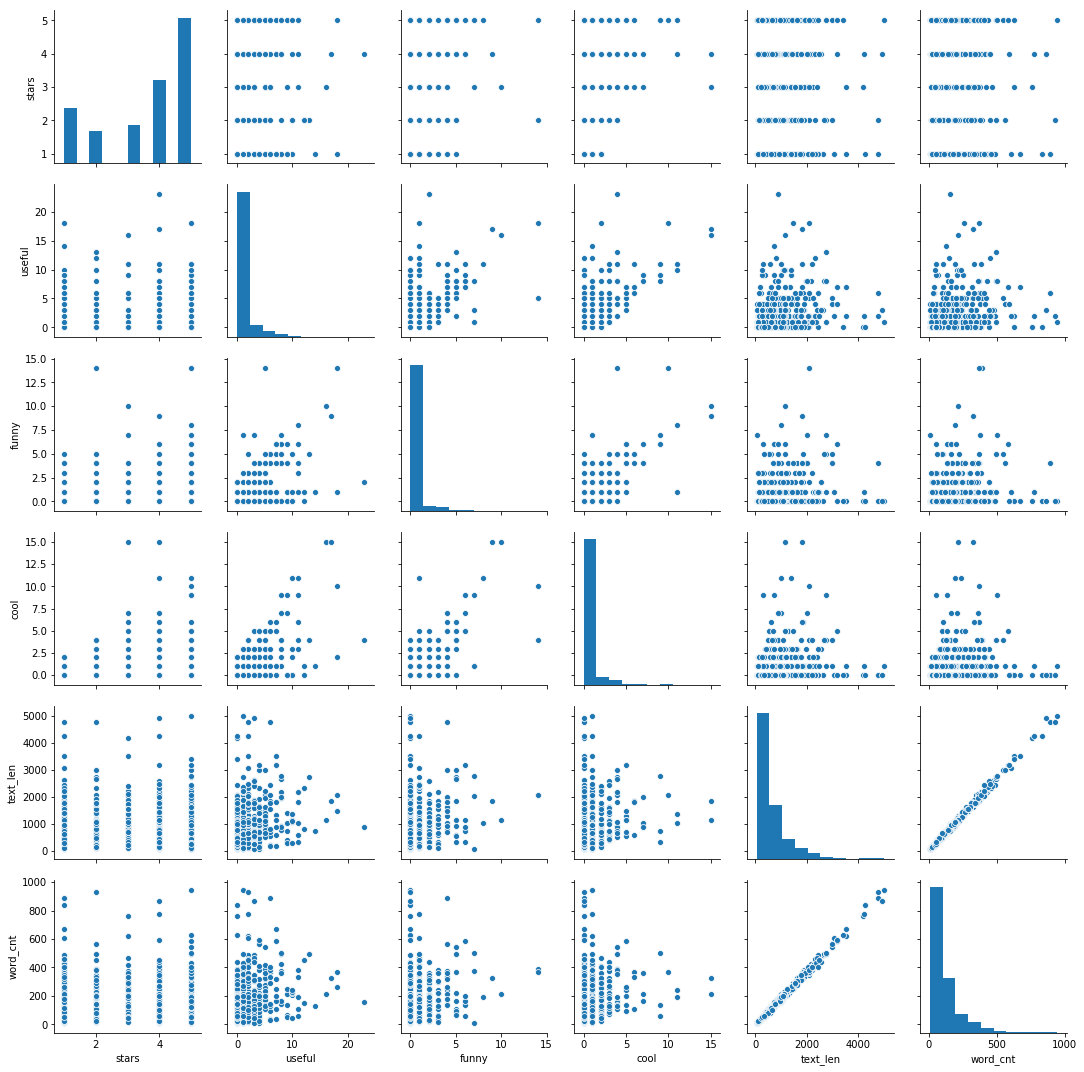

In [33]:
import seaborn as sns
sns.pairplot(df)
plt.show()

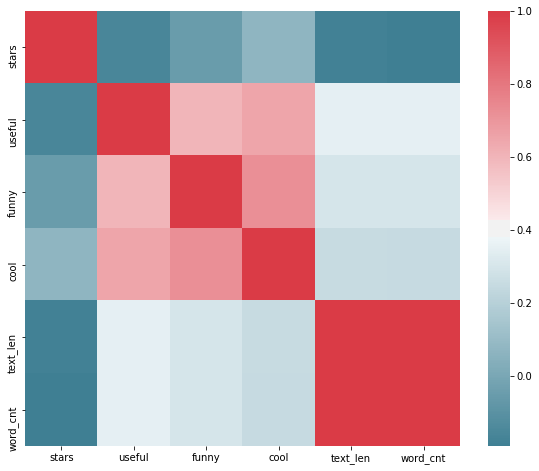

In [22]:
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, 
            ax=ax)
plt.show()